# Timing and testing code



# 1. Timing code:

We can use the **time** package.

See documentation here:

https://docs.python.org/3/library/time.html

In [2]:
# Import libraries
import mymodule.mymodule.mandel as md

import time

1696342711.88624
1696342712.216727
The execution time was = 0.3304870128631592 s.



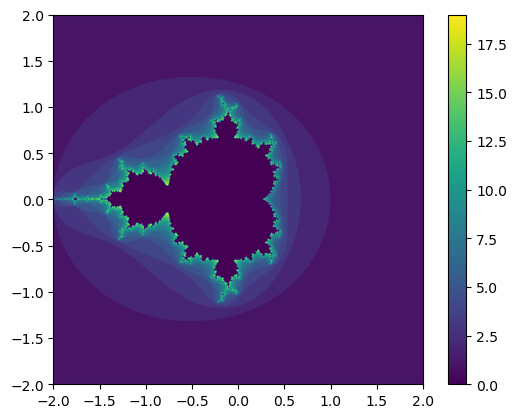

In [10]:
# Add a time stamp

start = time.time()

print(start)

# Define the initial parameters
N = 1024
max_iter = 20

# Call the md function
m = md.mandelbrot(N, max_iter = max_iter)


# Add another time stamp
end   = time.time()

print(end)

print(f"The execution time was = {end - start} s.\n")


In [14]:
# Import libraries

import stamodule.mdensity.densgen as dg
import stamodule.mdensity.velogen as vg

The grid has been generated.
PLot is ready.
Execution time is:  6.7758629322052


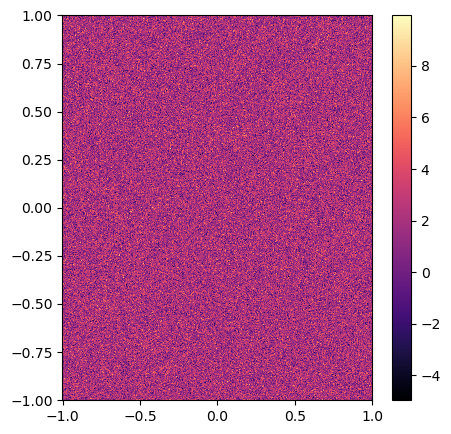

In [19]:
start_dg = time.time()

fig = dg.get_map(1000, "random")

end_dg = time.time()

exe_time = end_dg - start_dg

print("Execution time is: ", exe_time)

The grid has been generated.
Plot is ready.
Execution time is:  0.06407499313354492


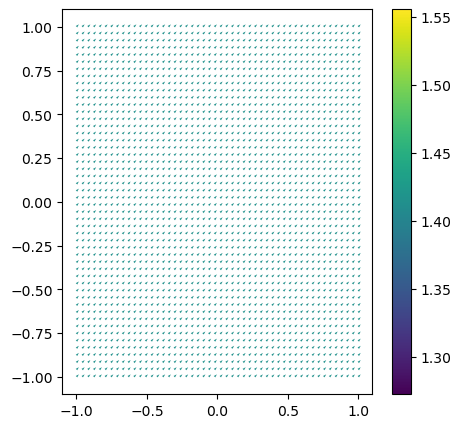

In [22]:
start_vg = time.time()

fig = vg.get_map(50, "uniform")

end_vg = time.time()

exe_time = end_vg - start_vg

print("Execution time is: ", exe_time)

# 2. Testing code:

- Testing is an integral part of the software development process.


- We want to catch mistakes early, before they go on to affect our results.


### Types of testing

There are a lot of different types of software testing that exist.


Most commonly, for scientific codes, we hear about:

a) **Unit testing:** Tests that a single function does what it was designed to do.


b) **Integration testing:** Tests whether the individual pieces work together as intended. Sometimes done one piece at a time (iteratively)


c) **Regression testing:** Checks whether changes have changed answers.


d) **Verification & Validation (from the science perspective)**


  - **Verification:** are we solving the equations correctly?


  - **Validation:** are we solving the correct equations?


## Unit testing

1) When to write tests?


  - Some people advocate writing a unit test for a specification before you write the functions they will test. This is called Test-driven development (TDD): https://en.wikipedia.org/wiki/Test-driven_development


  - This helps you understand the interface, return values, side-effects, etc. of what you intend to write.


2) Often we already have code, so we can start by writing tests to cover some core functionality. Add new tests when you encounter a bug, precisely to ensure that this bug doesn’t arise again.

  - Tests should be short

  - We want to be able to run them frequently.

## Test cases:

### a) Setup test cases

Setup test cases are designed to run at the beginning of your test case in order to declare and define conditions and variables. The primary benefit of using a setup test case is to simplify the process of making global changes to test case parameters. 

### b) Teardown test case:

A teardown test case will execute at the end of your test run within a test folder. Teardown test cases are used to perform post test execution actions. For example, a teardown test case can be used to delete test data generated during test execution.


## Testing with pytest:

`pytest` is a unit testing framework for python code.

Basic elements:



* Discoverability: it will find the tests


* Automation


* Fixtures (setup and teardown)




## Installing

You can install `pytest` for a single user as:

```
conda install -c anaconda pytest
```

Or simply: 

```
conda install pytest
```

Alternatively, you can use pytest:

```
pip3 install pytest --user
```

This should put `pytest` in your search path, likely in `~/.local/bin`.

If you want to generate coverage reports, you should also install `pytest-cov`:

```
pip3 install pytest-cov --user
```

## Test naming conventions:

Adhering to these naming conventions will ensure that your tests are automatically found:


1) File names should start or end with “test”:


  * `test_example.py`


  * `example_test.py`


2) For tests in a class, the class name should begin with `Test`


  * e.g., `TestExample`
  
  
  * There should be no `__init__()`


3) Test method / function names should start with `test_`

  * e.g., `test_example()`


## Assertions

Tests use assertions (via python’s `assert` statement) to check behavior at runtime


* See documentation here: https://docs.python.org/3/reference/simple_stmts.html#assert 


* Basic usage: `assert expression`


  * Raises `AssertionError` if expression is not true


  * e.g., `assert 1 == 0` will fail with an exception

### Example 1:

Create a file named `test_simple.py` with the following content:

```python
def multiply(a, b):
    return a*b

def test_multiply():
    assert multiply(4, 6) == 24

def test_multiply2():
    assert multiply(5, 6) == 2
```

then we can run the tests as:

```
pytest -v test_simple.py
```



## Fixtures:

Unit tests require some setup to be done before the test is run.  Fixtures provide this capability.


**pytest** provides `setup` and `teardown` functions/methods for tests, see https://docs.pytest.org/en/6.2.x/fixture.html for more details.


### Notes: 

- By default, **pytest** will capture **stdout** and only show it on failures. Remember that **stdout**, also known as **standard output**, is the default file descriptor where a process can write output. For example, in the terminal, standard output defaults to the user's screen.



- If you want to always show stdout, add the `-s` flag.


## Test class:


It is common to use a class to organize a set of related unit tests.


This is not a full-fledged class -- it simply helps to organize data.


In particular, there is no constructor, `__init__()`.


See: https://stackoverflow.com/questions/21430900/py-test-skips-test-class-if-constructor-is-defined



## What is a class method?

- A class method is a method that is bound to a class rather than its object.


- It doesn't require creation of a class instance, much like staticmethod.


- The difference between a static method and a class method is: 


    * Static method knows nothing about the class and just deals with the parameters.

    * Class method works with the class since its parameter is always the class itself.

    * The class method can be called both by the class and its object.

### Example:

We will look at an example with a NumPy array:


* We always want the array to exist for our tests, so we will use fixtures (in particular `setup_method()`) to create the array.


* Using a class means that we can access the array created in setup from our class.


* We'll use NumPy's own assertion functions: https://numpy.org/doc/stable/reference/routines.testing.html




In [23]:
import numpy as np

In [26]:
# Generate a vector
a = np.arange(24)

# Print the max
print(a)
print(a.max())
print(a.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
23
(24,)


In [28]:
# Reshape our array to make 2D
b = a.reshape(6, 4)

print(b)
print(b.max())
print(b.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
23
(6, 4)


In [29]:
# Flatten the array into 1D 
c = b.flatten()

print(c)
print(c.max())
print(c.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
23
(24,)


### Here's the example code:

```python
# a test class is useful to hold data that we might want setup
# for every test.

import numpy as np
from numpy.testing import assert_array_equal

class TestClassExample(object):

    @classmethod
    def setup_class(cls):
        """ this is run once for each class, before any tests """
        pass

    @classmethod
    def teardown_class(cls):
        """ this is run once for each class, after all tests """
        pass

    def setup_method(self):
        """ this is run before each of the test methods """
        self.a = np.arange(24).reshape(6, 4)

    def teardown_method(self):
        """ this is run after each of the test methods """
        pass

    def test_max(self):
        assert self.a.max() == 23

    def test_flat(self):
        assert_array_equal(self.a.flat, np.arange(24))
```

Put this into a file called `test_class.py` and then we can run as:

```
pytest -v test_class.py 
```

